# Exploratory Data Analysis

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.chdir(r'C:\Users\aarei\OneDrive - University of California, Davis\MSBA Work\Spring 2025\Application Domains\Individual Assignments\Individual Assignment 1')
os.getcwd()

'C:\\Users\\aarei\\OneDrive - University of California, Davis\\MSBA Work\\Spring 2025\\Application Domains\\Individual Assignments\\Individual Assignment 1'

In [5]:
bank_churn_data = pd.read_csv('Churn_Modelling_Dataset.csv')
bank_churn_data.head(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


The `.info()` method allows me to see several important pieces of information about the dataset, including that there are 0 null values.

In [6]:
bank_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Almost all of the data is numerical, however we have a few variables that are in the form of strings. `Geography` and `Gender` are two that we will want to include as predictors/features in our model, but seeing as `Geography` takes on only 3 different values, it should not be too difficult to encode these categorical variables.

In [7]:
bank_churn_data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

We can take a look at the summary statistics for all columns in the dataset. One thing we can quickly see from this is the mean of our target variable `Exited`, and which is also the proportion of positive (churned) cases because it is a binary variable that takes a 1 or 0. With a roughly 20/80% split between positive and negative cases, this dataset is moderately imbalanced.

In [12]:
bank_churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
bank_churn_data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Next we will visualize the distributions of our features: 

- `Credit Score`, `Age`, and `Tenure` are discrete variables so it is appropriate to represent them with column bar charts.
- We actually can observe some noticeable symmetry in these distributions. `Credit Score` seems to follow a bell-shape quite closely, while `Tenure` is almost uniformly distributed, albeit with shorter tails.
- Note that the lower bound for `Age` is 18, there is no one younger than that in the dataset. It is somewhat right skewed reflecting that most customers in the dataset are between 18 and 50, with a smaller minority above 50. If we hypothesize that younger customers are more likely to churn compared to older customers, the age distribution here could have some implication. 

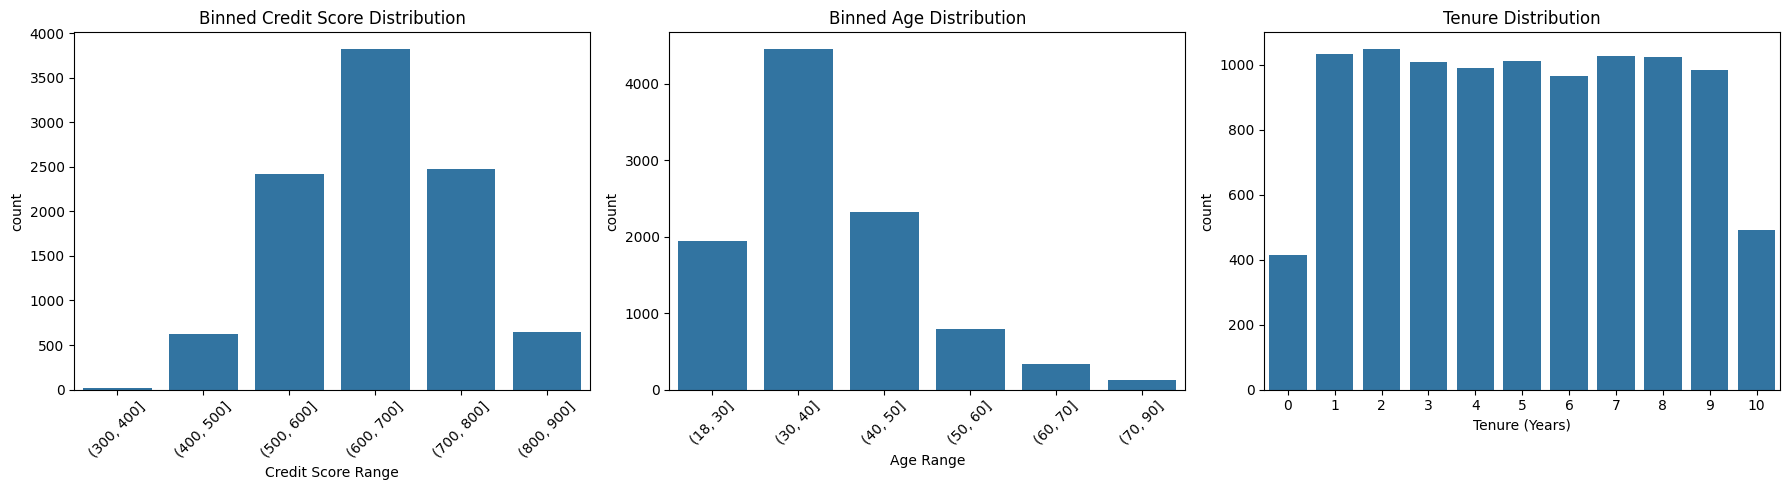

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Credit Score
sns.countplot(x=pd.cut(bank_churn_data['CreditScore'], bins=[300, 400, 500, 600, 700, 800, 900]), ax=axs[0])
axs[0].set_title('Binned Credit Score')
axs[0].set_xlabel('Credit Score Range')
axs[0].tick_params(axis='x', rotation=45)

# Age
sns.countplot(x=pd.cut(bank_churn_data['Age'], bins=[18, 30, 40, 50, 60, 70, 90]), ax=axs[1])
axs[1].set_title('Binned Age')
axs[1].set_xlabel('Age Range')
axs[1].tick_params(axis='x', rotation=45)

# Tenure
sns.countplot(x='Tenure', data=bank_churn_data, ax=axs[2])
axs[2].set_title('Tenure')
axs[2].set_xlabel('Tenure (Years)')

plt.tight_layout()
plt.show()

Next we look just at the `Number of Products` feature and take note that over 95% of the customers in the dataset have purchased just one or two products from the bank. Similarly as with age, if one is on average less likely to churn with each additional product purchased from the bank, the imbalance here in that category might also have some implication.

In [31]:
bank_churn_data['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

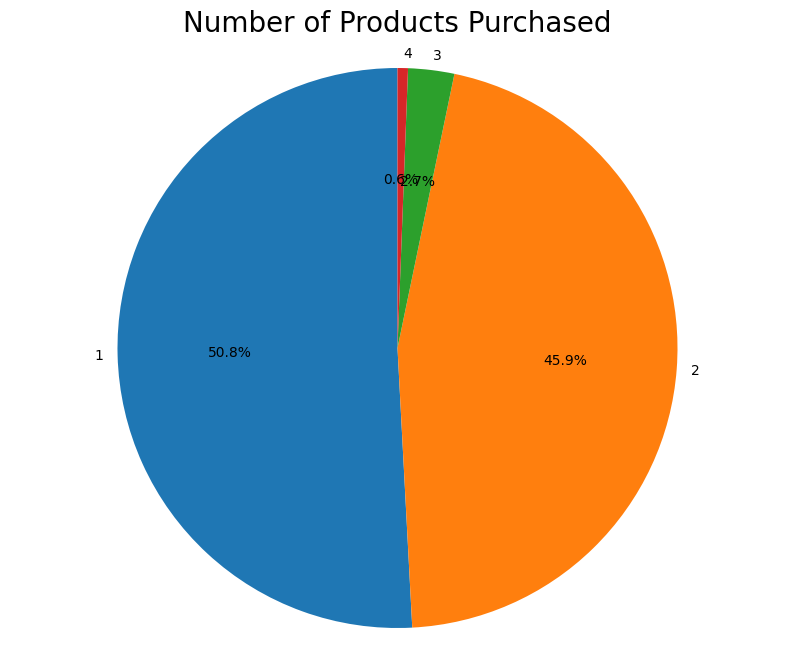

In [53]:
sizes = [len(bank_churn_data[bank_churn_data['NumOfProducts']==1]),
         len(bank_churn_data[bank_churn_data['NumOfProducts']==2]),
         len(bank_churn_data[bank_churn_data['NumOfProducts']==3]),
         len(bank_churn_data[bank_churn_data['NumOfProducts']==4])]

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=['1', '2', '3', '4'], autopct='%1.1f%%', startangle=90, labeldistance=1.05)
ax1.axis('equal')
plt.title("Number of Products Purchased", size = 20)
plt.show()

Now we do the same for our two continous variables `Balance` and `Estimated Salary`. The shapes of these distributions are quite interesting. `Estimated Salary` looks to follow a roughly uniform distribution, while `Balance` reflects that over a third of the observations have a relatively small account balance, while the other two thirds is nearly perfectly normally distributed.

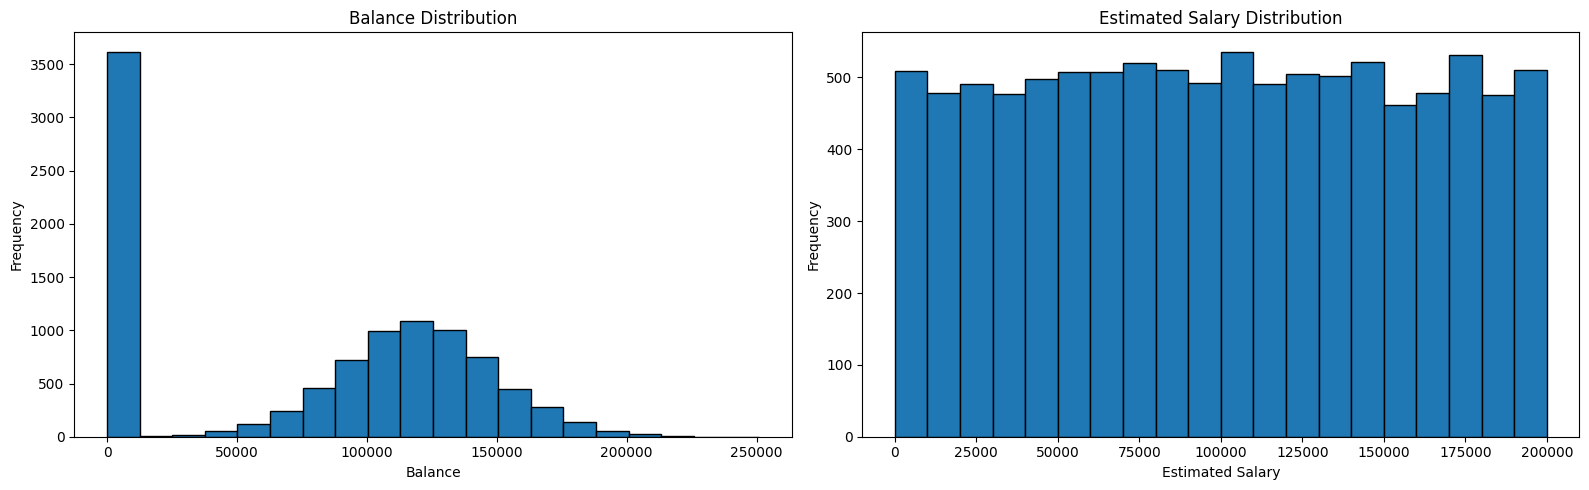

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Histogram for Balance
axs[0].hist(bank_churn_data['Balance'], bins=20, edgecolor='black')
axs[0].set_title('Balance Distribution')
axs[0].set_xlabel('Balance')
axs[0].set_ylabel('Frequency')

# Histogram for Estimated Salary
axs[1].hist(bank_churn_data['EstimatedSalary'], bins=20, edgecolor='black')
axs[1].set_title('Estimated Salary Distribution')
axs[1].set_xlabel('Estimated Salary')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Finally we plot a correlation heatmap, which can tell us how all the variables in the dataset correlate with each other. Two important pieces of information we can gleam from this are that 1. while none of the variables have much correlation with the target variable, the Age variable has the highest at a moderate ~0.3 positive correlation, and 2. that there is not much reason to expect there to be any issues of multicollinearity in this dataset.

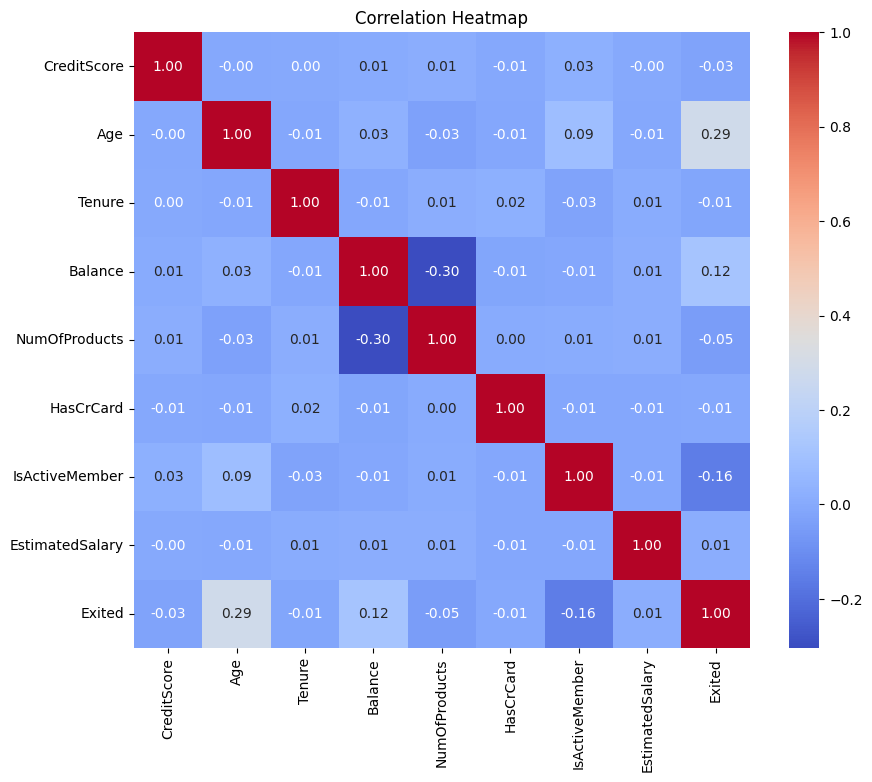

In [ ]:
corr = bank_churn_data.drop(columns=['RowNumber', 'CustomerId']).corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap')
plt.show()